## The aim of this project is to analyse trends resulting from growing prosperity of different countries. The dataset used was published and collected from (https://www.gapminder.org/data/). Different factors and data will be used for measurement such as :
* Electricity use per person
* Income per Capita (PPP)
* Gross Domestic Product (GDP, measured as PPP)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
%matplotlib inline


## **Data Wrangling**

In [2]:
# Read in the datasets
# GDP by Purchasing Power Parity (PPP)
df_gdp = pd.read_csv("total_gdp_ppp_inflation_adjusted.csv")
# Citizen Income Per Capita $ Purchasing Power Parity (PPP)
df_income = pd.read_csv("income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
# Electricity consumption per person
df_electricity = pd.read_csv("electricity_use_per_person.csv")
# Number of cellphones owned per 100 people
df_cellphones = pd.read_csv("cell_phones_per_100_people.csv")
# % of internet users by country
df_internet = pd.read_csv("internet_users.csv")
# Total annual oil consumption per country
df_oil = pd.read_csv("oil_consumption_total.csv")

In [3]:
# df_gdp.head(-5)
# df_income.head(-5)
# df_electricity.head(-5)
# df_cellphones.head(-5)
# df_internet.head(-5)
# df_oil.head(-5)

### It was observed that some countries and years has missing data. This could be attributed to the fact that data was either not available, or collected for a particular country in a year. Melft function will be used to turn data into a more analysable.

In [4]:
# Measures the Total Country GDP (in PPP)
# Using Melt to reshape the data to show country in the first column, followed by the year and GDP
df_gdp2 = pd.melt(df_gdp, id_vars="country", var_name="year", value_name="gdp")
df_gdp2

,country,year,gdp
0,Afghanistan,1800,2.080000e+09
1,Albania,1800,3.260000e+08
2,Algeria,1800,3.810000e+09
3,Andorra,1800,3.340000e+06
4,Angola,1800,1.020000e+09
...,...,...,...
41511,Venezuela,2013,5.320000e+11
41512,Vietnam,2013,4.650000e+11
41513,Yemen,2013,1.090000e+11
41514,Zambia,2013,4.400000e+10


In [5]:
# Measures the Income Per Capita (in PPP)
# Using Melt to reshape the data to show country in the first column, followed by the year and income
df_income2 = pd.melt(df_income, id_vars="country", var_name="year", value_name="income")
df_income2

,country,year,income
0,Afghanistan,1800,603
1,Albania,1800,667
2,Algeria,1800,715
3,Andorra,1800,1200
4,Angola,1800,618
...,...,...,...
46508,Venezuela,2040,9880
46509,Vietnam,2040,14400
46510,Yemen,2040,3870
46511,Zambia,2040,4180


In [6]:
# Measures electricity use Per Person
# This measures the electricity production of power plants and combined heat (i.e. energy not lost during transmission)
# Using Melt to reshape the data to show country in the first column, followed by the year and electricity consumption
df_electricity2 = pd.melt(df_electricity, id_vars="country", var_name="year", value_name="electricity_consumption")
df_electricity2

,country,year,electricity_consumption
0,Albania,1960,NaN
1,Algeria,1960,NaN
2,Angola,1960,NaN
3,Argentina,1960,NaN
4,Armenia,1960,NaN
...,...,...,...
7585,Venezuela,2014,2720.0
7586,Vietnam,2014,1420.0
7587,Yemen,2014,220.0
7588,Zambia,2014,717.0


In [7]:
# Measures the number of Cell Phone subscriptions (per 100 people)
# This is referring to the number of cell phone subscriptions
# Using Melt to reshape the data to show country in the first column, followed by the year and number of cellphones
df_cellphones2 = pd.melt(df_cellphones, id_vars="country", var_name="year", value_name="no_of_cellphones")
df_cellphones2

,country,year,no_of_cellphones
0,Afghanistan,1960,0.0
1,Albania,1960,0.0
2,Algeria,1960,0.0
3,Andorra,1960,0.0
4,Angola,1960,0.0
...,...,...,...
11441,Venezuela,2018,71.8
11442,Vietnam,2018,147.0
11443,Yemen,2018,53.7
11444,Zambia,2018,89.2


In [8]:
# This measures the total % of the country population that have an active internet connection
# Using Melt to reshape the data to show country in the first column, followed by the year and % of internet users
# by country
df_internet2 = pd.melt(df_internet, id_vars="country", var_name="year", value_name="percent_internet_users")
df_internet2

,country,year,percent_internet_users
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,NaN
3,Andorra,1960,NaN
4,Angola,1960,NaN
...,...,...,...
11441,Venezuela,2018,NaN
11442,Vietnam,2018,70.3
11443,Yemen,2018,NaN
11444,Zambia,2018,14.3


In [9]:
# Measures the total amount of crude Oil consumption in tonnes
# Using Melt to reshape the data to show country in the first column, followed by the year and % of internet users
# by country
df_oil2 = pd.melt(df_oil, id_vars="country", var_name="year", value_name="oil_consumption")
df_oil2

,country,year,oil_consumption
0,Algeria,1965,1290000.0
1,Argentina,1965,22100000.0
2,Australia,1965,15100000.0
3,Austria,1965,5560000.0
4,Azerbaijan,1965,NaN
...,...,...,...
3375,United Kingdom,2016,73100000.0
3376,United States,2016,863000000.0
3377,Uzbekistan,2016,2760000.0
3378,Venezuela,2016,28700000.0


## **Merge Datasets**

In [10]:
# Dataframes to merge
frames = [df_gdp2, df_income2, df_electricity2, df_cellphones2, df_internet2, df_oil2]
df_merged = reduce(lambda left, right: pd.merge(left, right, on=['country','year'], how='outer'), frames)

# We will filter our dataframe to only show data between the period of 1965 to 2013, inclusive. This was the range that the
# least amount of missing data was observed.
df_merged = df_merged[ (df_merged.year >= '1965') & (df_merged.year <= '2013')]
df_merged.sort_values(by=['country', 'year'], ascending=(True, True), inplace=True)

# Save output for reference
df_merged.to_csv("output.csv")
df_merged.head()

,country,year,gdp,income,electricity_consumption,no_of_cellphones,percent_internet_users,oil_consumption
32010,Afghanistan,1965,1.220000e+10,2640.0,NaN,0.0,NaN,NaN
32204,Afghanistan,1966,1.220000e+10,2600.0,NaN,NaN,NaN,NaN
32398,Afghanistan,1967,1.260000e+10,2600.0,NaN,NaN,NaN,NaN
32592,Afghanistan,1968,1.300000e+10,2620.0,NaN,NaN,NaN,NaN
32786,Afghanistan,1969,1.310000e+10,2590.0,NaN,NaN,NaN,NaN


In [11]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9506 entries, 32010 to 41515
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  9506 non-null   object 
 1   year                     9506 non-null   object 
 2   gdp                      9484 non-null   float64
 3   income                   9457 non-null   float64
 4   electricity_consumption  5483 non-null   float64
 5   no_of_cellphones         7616 non-null   float64
 6   percent_internet_users   3982 non-null   float64
 7   oil_consumption          3019 non-null   float64
dtypes: float64(6), object(2)
memory usage: 668.4+ KB


In [12]:
df_merged.drop(['no_of_cellphones', 'percent_internet_users','oil_consumption'], axis=1, inplace=True)
df_merged
## These data were dropped due to insufficient amount of data for analysis

,country,year,gdp,income,electricity_consumption
32010,Afghanistan,1965,1.220000e+10,2640.0,NaN
32204,Afghanistan,1966,1.220000e+10,2600.0,NaN
32398,Afghanistan,1967,1.260000e+10,2600.0,NaN
32592,Afghanistan,1968,1.300000e+10,2620.0,NaN
32786,Afghanistan,1969,1.310000e+10,2590.0,NaN
...,...,...,...,...,...
40739,Zimbabwe,2009,1.400000e+10,1630.0,585.0
40933,Zimbabwe,2010,1.530000e+10,1930.0,607.0
41127,Zimbabwe,2011,1.680000e+10,2170.0,636.0
41321,Zimbabwe,2012,1.850000e+10,2490.0,609.0


## **Data Cleaning**

### It was observed that there are a lot of discrepancies between the different dimensions of missing data. Interpolating between the missing years and extrapolate for the years outside the range 

In [13]:
# Fill in empty cells
# Define helper function
def fill_missing(grp):
    res = grp.set_index('year')\
    .interpolate(method='linear',limit=5)\
    .fillna(method='ffill')\
    .fillna(method='bfill')
    del res['country']
    return res
    
# Group by country name and fill missing
df = df_merged.groupby(['country']).apply(
    lambda grp: fill_missing(grp)
)
df = df.reset_index()

# Drop rows with empty data and save to a new dataframe
df = df.dropna()

# Save dataframe to csv
df.to_csv("output_clean.csv")

# View the cleaned data with empty values filled for which observations exist on a per-country basis
df.head()

,country,year,gdp,income,electricity_consumption
49,Albania,1965,6.330000e+09,2990.0,532.0
50,Albania,1966,6.750000e+09,3100.0,532.0
51,Albania,1967,7.200000e+09,3220.0,532.0
52,Albania,1968,7.660000e+09,3330.0,532.0
53,Albania,1969,8.120000e+09,3440.0,532.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 49 to 9505
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  6762 non-null   object 
 1   year                     6762 non-null   object 
 2   gdp                      6762 non-null   float64
 3   income                   6762 non-null   float64
 4   electricity_consumption  6762 non-null   float64
dtypes: float64(3), object(2)
memory usage: 317.0+ KB


In [15]:
df.describe()

,gdp,income,electricity_consumption
count,6.762000e+03,6762.000000,6762.000000
mean,3.601135e+11,15062.996747,2939.386899
std,1.150131e+12,19456.906979,4158.151598
min,6.290000e+08,312.000000,5.760000
25%,1.920000e+10,3600.000000,312.000000
50%,5.850000e+10,8600.000000,1470.000000
75%,2.360000e+11,19100.000000,4020.000000
max,1.640000e+13,179000.000000,54800.000000


### As can be seen above, no rows with missing data in the current cleaned data. Plotting a histogram could help us understand our data better.

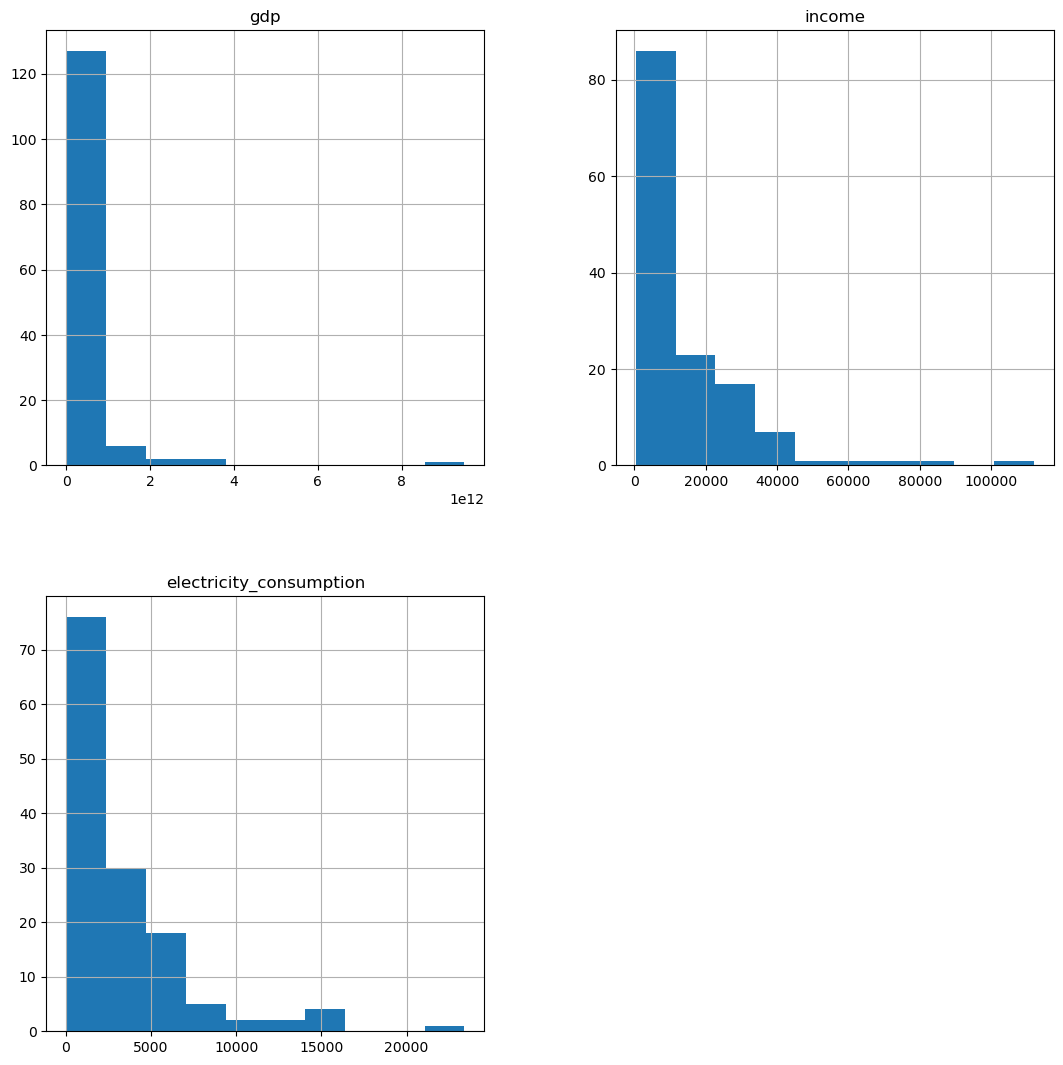

In [16]:
# Histogram for ALL the data in the year 1965
df[df['year'] == '1990'].hist(figsize=(13,13));

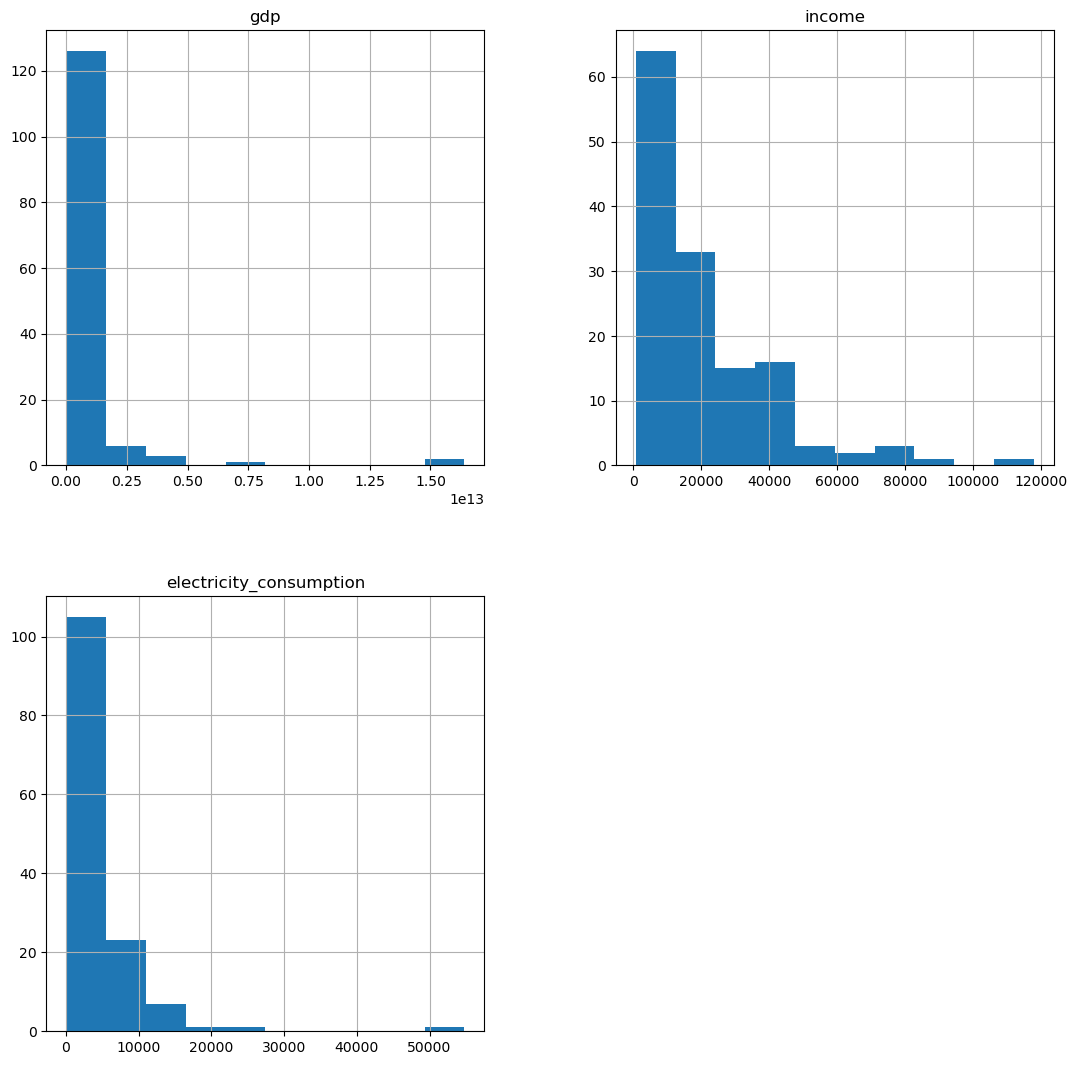

In [17]:
# Histogram for ALL the data in the year 2013
df[df['year'] == '2013'].hist(figsize=(13,13));

In [18]:
# Observing first three quartiles for year 1990 and 2013
df[df['year'] == '1990'].quantile([0.25,0.5,0.75])

,gdp,income,electricity_consumption
0.25,2.077500e+10,3622.5,362.75
0.50,6.015000e+10,8645.0,1385.00
0.75,2.497500e+11,20150.0,4307.50


In [19]:
df[df['year'] == '2013'].quantile([0.25,0.5,0.75])

,gdp,income,electricity_consumption
0.25,3.687500e+10,5477.5,766.5
0.50,1.390000e+11,14400.0,2505.0
0.75,4.550000e+11,28200.0,5395.0


### **Income Per Capita**

### It was observed that within these years the income are heavily skewed towards the right. 75% of the data used have an Income Per Capita equal to, or less than $41,000. This means that most of the countries in the data does not have a high income and only 25% of these countries have a high income.

### **GDP In Purchasing Power Parity**
### The trend was also similar to the trend in income per capita where the data are heavily skewed towards the right. This indicates that there is only a few countries where the people could have a higher chance of having economic prosperity. It is also possible that a country could have a high income per capita but a lower GDP due to less number of population and standard of living in these respective countries.

## Exploratory Data Analysis(EDA)

### In this section, we would like to answer three main questions which is:
1. Have certain countries of the world been growing in the selected metrics better than others ?
2. How has income growth differed between the two major developing economies, China and India ?
3. Correlation between rising per capita income levels and electricity usage per person ?

### Exploring the economic growth in China, India, Japan and comparing it with United States within year 1965 and 2013 would help give us a better understanding and provide answers to the questions above.